In [15]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
diab=pd.read_csv("diabetes.csv")


In [2]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


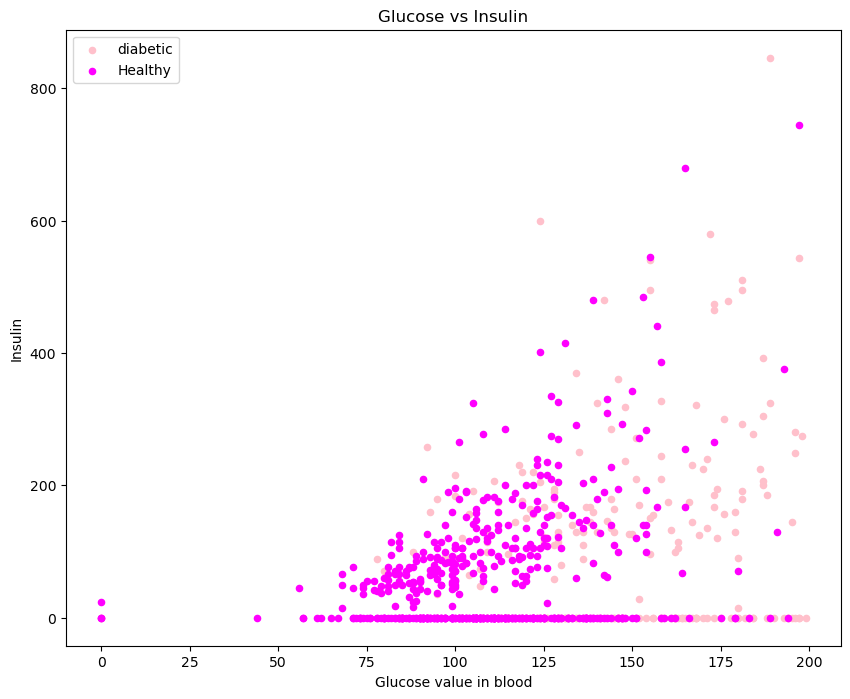

In [4]:
fig=diab[diab.Outcome==1].plot(kind="scatter",x="Glucose",y="Insulin",color="pink",label="diabetic")
diab[diab.Outcome==0].plot(kind="scatter",x="Glucose",y="Insulin",color="Fuchsia",label="Healthy",ax=fig)

fig.set_title("Glucose vs Insulin")
fig.set_xlabel("Glucose value in blood")

fig=plt.gcf()
fig.set_size_inches(10,8)

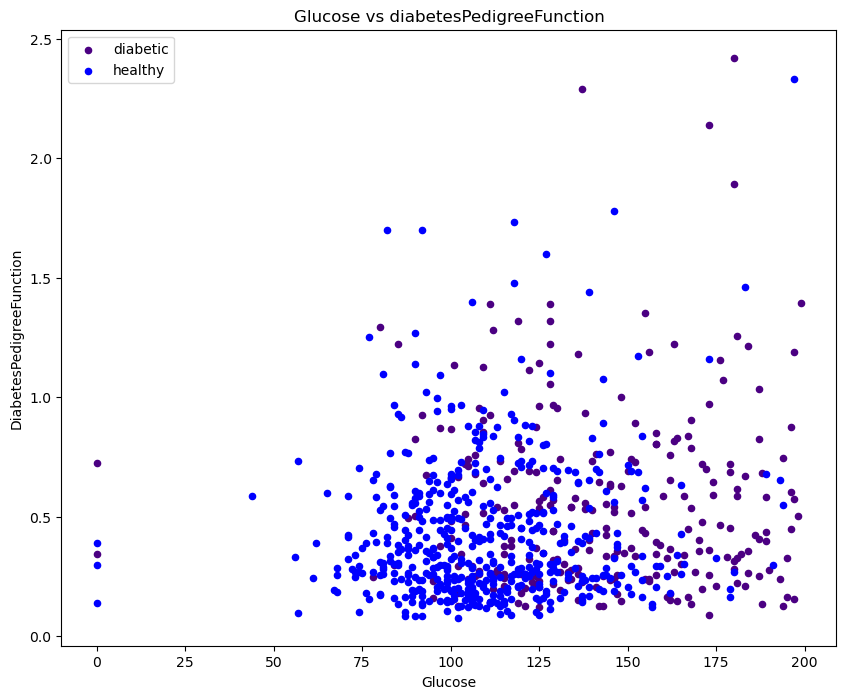

In [5]:
fig=diab[diab.Outcome==1].plot(kind="scatter",x="Glucose",y="DiabetesPedigreeFunction",color="indigo",label="diabetic")
diab[diab.Outcome==0].plot(kind="scatter",x="Glucose",y="DiabetesPedigreeFunction",color="blue",label="healthy",ax=fig)
fig.set_title("Glucose vs diabetesPedigreeFunction")

fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

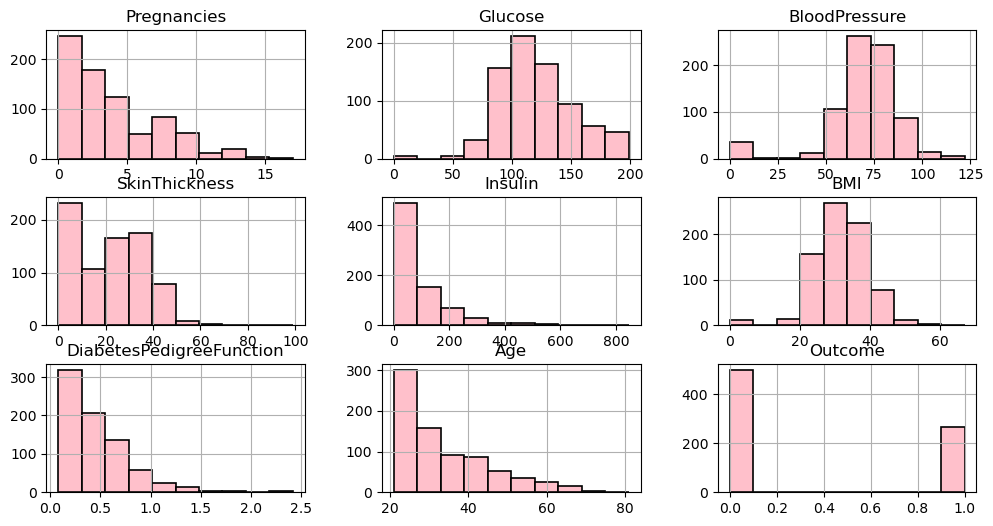

In [6]:
diab.hist(edgecolor="black",linewidth=1.2,color="pink")
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()


In [7]:
from sklearn.linear_model import LogisticRegression
#linear model library
#logistic regression is the function
from sklearn.model_selection  import train_test_split#for splitting the data into test and train
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics #for checking the modal accuracy
from sklearn.tree import DecisionTreeClassifier

In [8]:
#splitiing the dataset to test and train data
train,test=train_test_split(diab,test_size=0.2)
print(train.shape)
print(test.shape)

(614, 9)
(154, 9)


In [9]:
train_x=train[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]
train_y=train.Outcome
test_x=test[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]
test_y=test.Outcome

In [10]:
train_y.head()

508    0
401    0
530    0
281    0
575    0
Name: Outcome, dtype: int64

In [11]:
model=LogisticRegression()
model.fit(train_x,train_y) 
prediction=model.predict(test_x)#algorithm runs here
print("The accuracy of logistic regression is",metrics.accuracy_score(prediction,test_y))

The accuracy of logistic regression is 0.7792207792207793


In [12]:
x=diab.iloc[:,:-1].values
y=diab.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
#Logistic regression:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifier=LogisticRegression()
classifier.fit(x_train,y_train)

x_text=[]
y_pred=classifier.predict(x_test)
#print(y_pred)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

from sklearn.metrics import accuracy_score
print("The accuracy score is", accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

[[98  9]
 [18 29]]
The accuracy score is 0.8246753246753247


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
